In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii

In [2]:
class Star():
	'''
	inputs
	------

	'''
	def __init__(self, Mass,weight): # initaionliing the class with mass
		self.mass=Mass #giving star class atribute mass
		self.calc_rest() # profoming calc_rest fucntion definded below
		self.Dead=False # Giving star atribute dead and initalizing it to false i.e. star is alive
		self.Blown=False
		self.Weight=weight
	
	def calc_rest(self): #defining calc_rest 
		self.TMS=10**10 *(self.mass)**(-3.5) # calculating the time on the main sequnce 
	
	def Wind(self): # setting up wind procedure for stars past MS
		if self.Blown==True: #checking for wind 
			print("Star's wind already accounted for") # rpinting error message
			return 0,0,0,0 # retunring 0 mass to ism
		else:
			if self.mass>=3: # for stars greater than or equal to 3 solar masses
				self.Blown==True
				winda=0.015*self.mass*self.Weight
				windb=0.01*self.mass*self.Weight
				return winda,winda,windb,0.00
			else:
				return 0,0,0,0

	def Kill(self): # setting up Kill funciton
		if self.Dead==True: # checking if star has not already been killed
			print("Star already Dead ", self.mass) # Printing warning
			return 0,0,0,0 # retuening 0 mass to ism
		else:
			if self.mass>8: # for massive stars
				self.dead=True #setting the dead atribute to true
				if self.mass<50: # for less massive set mass for neutron star as reminent
					self.mass=1.4 # setting mass for reminent
				else:
					self.mass=3.0 # setting mass of remeninat for very massive stars.
				return 0.1*self.Weight,0.1*self.Weight,0.1*self.Weight,0.3*self.Weight # returning masses of elemens given to ISM  [C,N,O,Fe]
			elif self.mass<=8: # for non massive stars
				self.dead=True# setting dead to True
				self.mass=0
				return 0.3*self.Weight,0.3*self.Weight,0.3*self.Weight,0.3*self.Weight# returning masses of elemens given to ISM  [C,N,O,Fe]


In [3]:
def IMF():
	Masses=[]
	Weights=[]
	Mran=np.linspace(0.1,100,10000)
	#Const=36354.560545987355
	C= lambda Min, Max,total: total/(-0.35)*(Max**(-(0.35))-Min**(-(0.35)))
	N= lambda M1, M2: C(0.1,100,10**12)/(-1.35) *(M2**(-(1.35))-M1**(-(1.35)))
	for i in range(1,len(Mran)):
	    Masses.append((Mran[i-1]+Mran[i])/2)
	    Weights.append(N(Mran[i-1],Mran[i]))
	        
	return Masses,Weights # returning IMF mass array
MassArray,WeightArray=IMF() #Getting mass array from above function 
Galaxy=[] #creating an empty galaxy
for i in range(len(MassArray)): #populating galazy with stars from IMF
	Galaxy.append(Star(MassArray[i],WeightArray[i])) #appending Galaxyarray with star objects

In [4]:
def IMF(Mass):
	Masses=[]
	Weights=[]
	Mran=np.linspace(0.1,100,10000)
	#Const=36354.560545987355
	C= lambda Min, Max,total: (total*(-0.35))/((Max**(-(0.35))-Min**(-(0.35))))
	N= lambda M1, M2: (C(0.1,100,Mass)/(-1.35)) *(M2**(-(1.35))-M1**(-(1.35)))
	for i in range(1,len(Mran)):
	    #Masses.append((Mran[i-1]+Mran[i])/2)
	    Masses.append(Mran[i])
	    Weights.append(N(Mran[i-1],Mran[i]))
	        
	return Masses,Weights # returning IMF mass array
iMStar=10**12
MassArray,WeightArray=IMF(iMStar)

In [16]:
totalmass=sum([a*b for a,b in zip(MassArray,WeightArray)])

In [5]:
LookBack= lambda z: (2/(3*H0))*(1-(1/(1+z)**(3/2)))
H0= 1/13.8e9

In [30]:
Z=np.linspace(0,12,1000) #creating array of reshifts staring at z=12 and going to 0 with 100000 elements
Time1=LookBack(Z)
Time=np.abs(Time1-max(Time1))[::-1]
t=Time[767]

In [33]:
Z[Time==t][0]

9.213213213213214

In [10]:
DATA=ascii.read('OutputBigSB.csv')
DATA.show_in_notebook()

idx,z,Time,ISM,Stars,H,He,C,N,O,Fe
0,0.0,0.0,1000000000000.0,1014536467465.17,760000000000.0,240000000000.0,0.0,0.0,0.0,0.0
1,0.012012012012012012,163311205.6303573,1208807161635.8018,801146422330.818,139396073574.27527,44019812707.66554,5982164726.818104,5982164726.818104,5976268859.085155,7450677041.146409
2,0.024024024024024024,321847326.4863908,4385977994852.383,778490028129.8905,1646431844537.557,519925845643.5857,304539422056.2415,304539422056.2415,304533526188.5086,306007934370.5694
3,0.036036036036036036,475801569.1486285,8704693521133.546,764699032662.2928,3489678440161.0107,1102003717945.0193,777887186644.5306,777887186644.5306,777881290776.7977,779355698958.8604
4,0.04804804804804805,625357204.1644762,13738600080653.916,754975570057.5848,5439847751836.041,1717846658475.6602,1394860763474.3171,1394860763474.3171,1394854867606.5842,1396329275788.647
5,0.06006006006006006,770688183.519772,19328644022631.246,746661750896.6473,7440377922369.87,2349593028117.109,2134302613925.2778,2134302613925.2778,2134296718057.545,2135771126239.6077
6,0.07207207207207207,911959713.2678356,25428443826649.758,740256839592.6986,9462177651836.973,2988056100582.4297,2994186864450.158,2994186864450.158,2994180968582.4253,2995655376764.484
7,0.08408408408408408,1049328785.0320913,31944357588685.58,734817539413.9166,11484374728904.443,3626644651236.072,3957968898034.821,3957968898034.821,3957963002167.088,3959437410349.1465
8,0.0960960960960961,1182944669.753151,38829493001438.39,730535986649.6969,13494174252925.23,4261318185136.8687,5018134486748.112,5018134486748.112,5018128590880.379,5019602999062.444
9,0.10810810810810811,1312949376.7414486,46017092470204.73,726066528980.237,15485459384956.162,4890145068939.107,6160006349985.938,6160006349985.938,6160000454118.205,6161474862300.2705


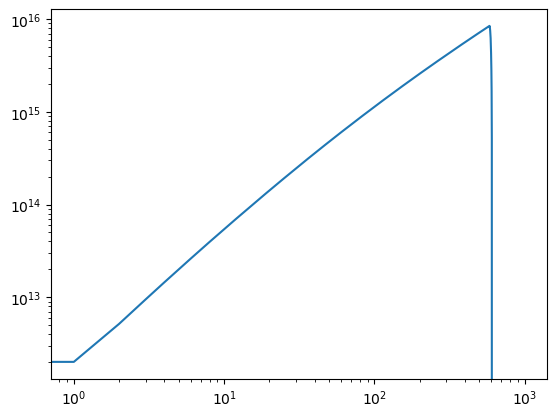

In [11]:
plt.loglog(DATA['ISM']+DATA['Stars'])